List of Imported Libraries:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

new-voter-registration.csv dataframe assigned to a variable:

In [8]:
voters = gpd.read_file("https://raw.githubusercontent.com/fivethirtyeight/data/refs/heads/master/voter-registration/new-voter-registrations.csv")
voters

,Jurisdiction,Year,Month,New registered voters
0,Arizona,2016,Jan,25852
1,Arizona,2016,Feb,51155
2,Arizona,2016,Mar,48614
3,Arizona,2016,Apr,30668
4,Arizona,2020,Jan,33229
...,...,...,...,...
101,Virginia,2020,Jan,25934
102,Virginia,2020,Feb,29507
103,Virginia,2020,Mar,31492
104,Virginia,2020,Apr,5467


**Purpose/Goal:**

The purpose of this project is to look at trends in new voter registrations across the United States and to gain insights that can inform government outreach and aid in policy decision-making. The goal is to examine state level trends and pick out key differences in registration behaviors. This notebook can be important for stakeholders who wish to better understand voter engagement patterns over time and help to understand what could help improve theirs. It can also be useful to everyday people like ourselves to see how civically engaged others are within our own states.

**Research Questions**:

Research Question 1: Which states show the highest variability in monthly voter registrations, and what does that say about their volatility in voter engagement over time?

Research Question 2: For California, how do new voter registrations vary over the years and months, and can we say they had a positive relationship compared to a state like New York?

First 5 rows of dataframe displayed:

In [9]:
voters.head()

,Jurisdiction,Year,Month,New registered voters
0,Arizona,2016,Jan,25852
1,Arizona,2016,Feb,51155
2,Arizona,2016,Mar,48614
3,Arizona,2016,Apr,30668
4,Arizona,2020,Jan,33229


Variables and their meanings:

Jurisdiction: The state or region where registration took place.

Year: The year in which the registrations took place.

Month: The month in which the registrations took place.

New registered voters: The number of new voter registrations in that month,year, and region.


In [10]:
voters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Jurisdiction           106 non-null    object
 1   Year                   106 non-null    object
 2   Month                  106 non-null    object
 3   New registered voters  106 non-null    object
dtypes: object(4)
memory usage: 3.4+ KB


No entries are missing in the dataframe.

In [11]:
voters.isnull().sum()

,0
Jurisdiction,0
Year,0
Month,0
New registered voters,0


In [6]:
voters.dtypes

,0
Jurisdiction,object
Year,object
Month,object
New registered voters,object


New dataframe created with new column names:

In [12]:
voters_2 = voters.rename(columns={"Jurisdiction":"NAME", "New registered voters":"registered_voters"})
voters_2

,NAME,Year,Month,registered_voters
0,Arizona,2016,Jan,25852
1,Arizona,2016,Feb,51155
2,Arizona,2016,Mar,48614
3,Arizona,2016,Apr,30668
4,Arizona,2020,Jan,33229
...,...,...,...,...
101,Virginia,2020,Jan,25934
102,Virginia,2020,Feb,29507
103,Virginia,2020,Mar,31492
104,Virginia,2020,Apr,5467


Potential Limitations:

The dataset covers only a specific time period, which might not capture long-term trends or recent changes.
Not all states are recorded in the dataset so also does not measure the entire United States on registration.
There is no demographic or contextual information given, which limits deeper insights into factors that would play into the registration trends.

The highest amount of new voter registration was shown to be 238,281 people in the state of California in Feburary of 2020.



In [13]:
voters_2['registered_voters'] = voters_2['registered_voters'].str.replace(',', '').astype(int)
max = voters_2['registered_voters'].idxmax()
max_regis = voters_2.loc[max]
max_regis

,13
NAME,California
Year,2020
Month,Feb
registered_voters,238281


About an average of 48,223 people registered to vote amongst the states from 2016-2020.

In [15]:
avg_regis = voters_2['registered_voters'].mean()
avg_regis

48223.46226415094

The number of new voter registrations went above average around 36 times over the years of 2016-2020.

In [20]:
high_voters = voters_2[voters_2['registered_voters'] > avg_regis]
high_voters_count = high_voters.shape[0]
high_voters_count

36

In [21]:
high_voters

,NAME,Year,Month,registered_voters
1,Arizona,2016,Feb,51155
2,Arizona,2016,Mar,48614
5,Arizona,2020,Feb,50853
8,California,2016,Jan,87574
9,California,2016,Feb,103377
10,California,2016,Mar,174278
11,California,2016,Apr,185478
12,California,2020,Jan,151595
13,California,2020,Feb,238281
14,California,2020,Mar,176810


Below is a dataset showing each state and the number of times their new voter registrations went above national average.


In [22]:
state_counts = voters_2[voters_2['registered_voters'] > avg_regis].groupby('NAME').size().reset_index(name='count')
state_counts

,NAME,count
0,Arizona,3
1,California,7
2,Florida,7
3,Georgia,1
4,Illinois,4
5,North Carolina,6
6,Texas,8


California, Texas, and Florida had the highest state average overall in new voter registrations.

In [24]:
state_avg = voters_2.groupby('NAME')['registered_voters'].mean().reset_index()

top_three = state_avg.sort_values(by='registered_voters', ascending=False).head(3)
top_three

,NAME,registered_voters
1,California,144545.375
10,Texas,114610.100
5,Florida,65868.125


Barplot showing Total New Voter Registrations by State:

California and Texas closely the highest totals amongst the states, with Delaware and D.C having the least.

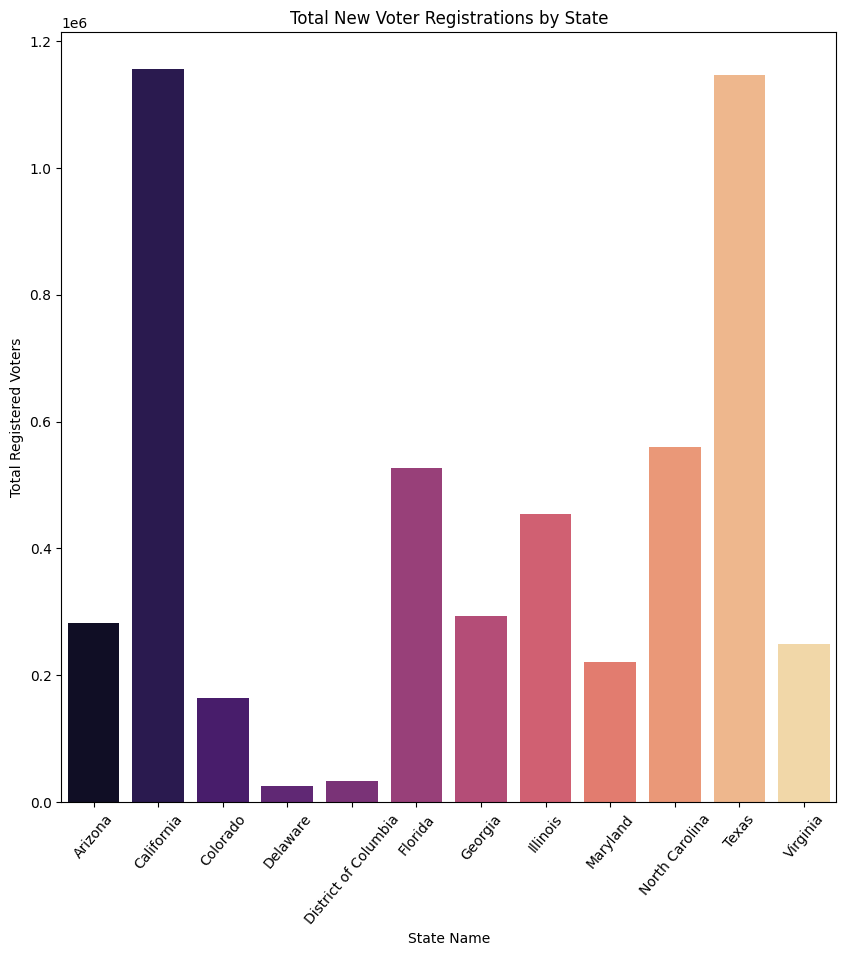

In [41]:
state_totals = voters_2.groupby('NAME')['registered_voters'].sum().reset_index()

plt.figure(figsize=(10,10))
sns.barplot(data=state_totals, x='NAME', y='registered_voters', hue='NAME',palette='magma')
plt.xlabel('State Name')
plt.ylabel('Total Registered Voters')
plt.title('Total New Voter Registrations by State')
plt.xticks(rotation=50)
plt.show()

The bar plot illustrates that some states have markedly higher total registrations than others. This could be due to differences in population size or the effectiveness of voter registration efforts.

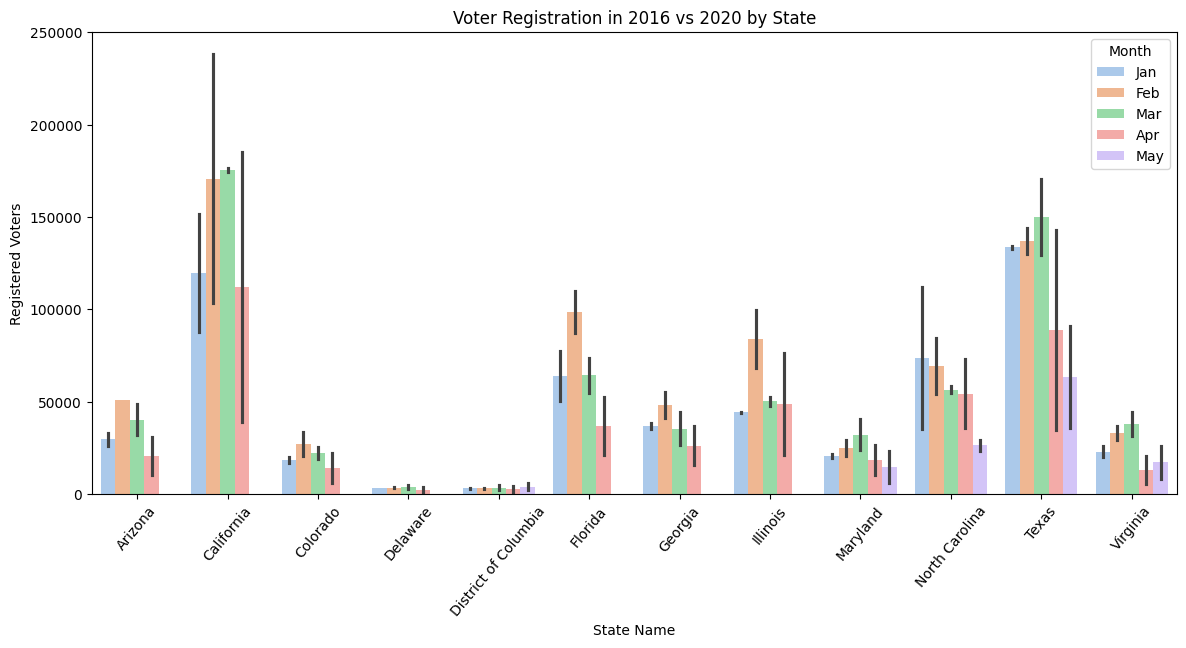

In [43]:
data_2016_2020 = voters_2[voters_2['Year'].isin(['2016', '2020'])]

plt.figure(figsize=(14,6))
sns.barplot(data=data_2016_2020, x='NAME', y='registered_voters', hue='Month', palette='pastel')
plt.xlabel('State Name')
plt.ylabel('Registered Voters')
plt.title('Voter Registration in 2016 vs 2020 by State')
plt.xticks(rotation=50)
plt.legend(title='Month')
plt.show()

The plot shows differences in voter registration between 2016 and 2020. The color coding by month highlights differences in registration numbers. Some states show more pronounced changes over time, suggesting that specific months might be more critical for registration efforts.

This visualization addresses Research Question 1 by showing which states have the greatest variability in monthly voter registrations. States with high standard deviation values indicate less consistent registration patterns, which could imply fluctuating voter engagement or the impact of specific registration drives.

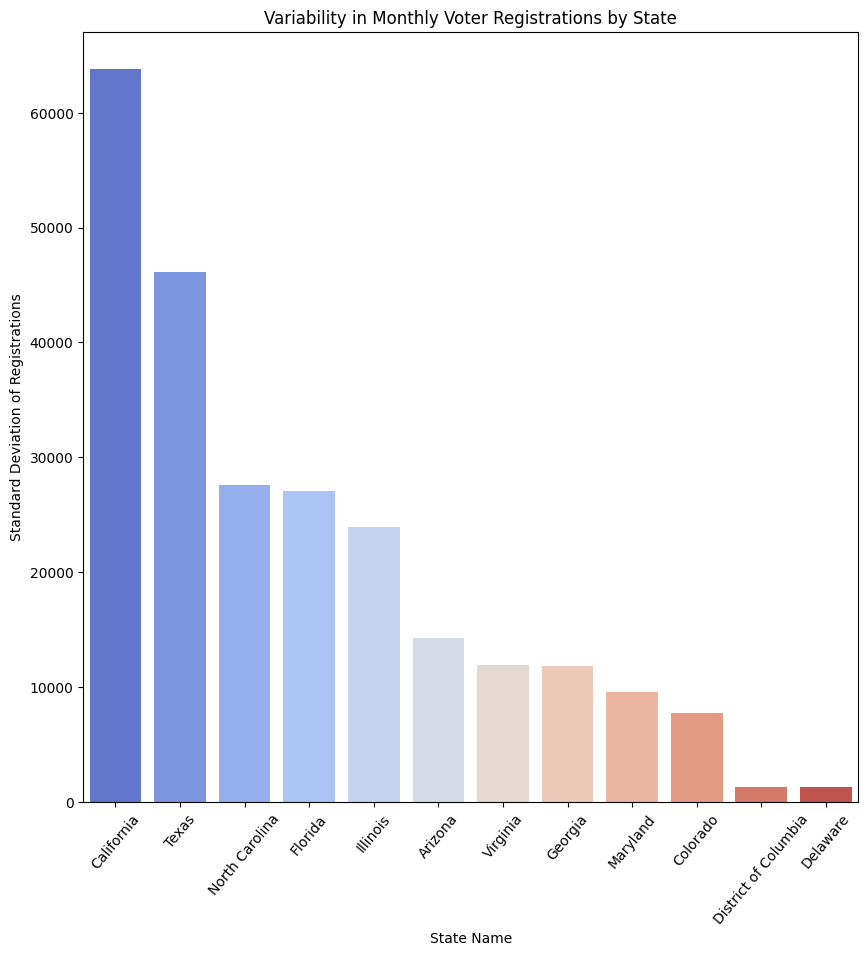

In [66]:
state_volatility = voters_2.groupby('NAME')['registered_voters'].std().reset_index()
state_volatility = state_volatility.sort_values(by='registered_voters', ascending=False)

plt.figure(figsize=(10,10))
sns.barplot(data=state_volatility, x='NAME', y='registered_voters', hue='NAME', palette='coolwarm')
plt.xlabel('State Name')
plt.ylabel('Standard Deviation of Registrations')
plt.title('Variability in Monthly Voter Registrations by State')
plt.xticks(rotation=50)
plt.show()

This is the shapefile used in the mapping unit:

In [53]:
!git clone https://github.com/SFord87/325-Datasets

Cloning into '325-Datasets'...
remote: Enumerating objects: 53, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 53 (delta 13), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (53/53), 7.37 MiB | 11.31 MiB/s, done.
Resolving deltas: 100% (13/13), done.


In [61]:
shapefile = '/content/325-Datasets/cb_2018_us_state_500k.shp'
us_states = gpd.read_file(shapefile)

US bounds set:

In [62]:
us_bounds = us_states.total_bounds
print("US Bounds:", us_bounds)

US Bounds: [-179.148909  -14.548699  179.77847    71.365162]


Average voter registration per state:

In [63]:
state_avg = voters_2.groupby('NAME')['registered_voters'].mean().reset_index()

state_avg['NAME'] = state_avg['NAME']
state_avg

,NAME,registered_voters
0,Arizona,35311.500
1,California,144545.375
2,Colorado,20527.500
3,Delaware,3166.375
4,District of Columbia,3248.400
5,Florida,65868.125
6,Georgia,36604.125
7,Illinois,56840.375
8,Maryland,22133.500
9,North Carolina,56040.800


Merged Dataframe:

In [64]:
us_states['NAME'] = us_states['NAME']
merged = us_states.merge(state_avg, on='NAME', how='inner')
merged

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,registered_voters
0,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ...",56040.800
1,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ...",24845.200
2,12,00294478,0400000US12,12,FL,Florida,00,138949136250,31361101223,"MULTIPOLYGON (((-80.17628 25.52505, -80.17395 ...",65868.125
3,48,01779801,0400000US48,48,TX,Texas,00,676653171537,19006305260,"MULTIPOLYGON (((-94.7183 29.72886, -94.71721 2...",114610.100
4,06,01779778,0400000US06,06,CA,California,00,403503931312,20463871877,"MULTIPOLYGON (((-118.60442 33.47855, -118.5987...",144545.375
5,13,01705317,0400000US13,13,GA,Georgia,00,149482048342,4422936154,"MULTIPOLYGON (((-81.27939 31.30792, -81.27716 ...",36604.125
6,08,01779779,0400000US08,08,CO,Colorado,00,268422891711,1181621593,"POLYGON ((-109.06025 38.59933, -109.05954 38.7...",20527.500
7,17,01779784,0400000US17,17,IL,Illinois,00,143780567633,6214824948,"POLYGON ((-91.51297 40.18106, -91.51107 40.188...",56840.375
8,04,01779777,0400000US04,04,AZ,Arizona,00,294198551143,1027337603,"POLYGON ((-114.81629 32.50804, -114.81432 32.5...",35311.500
9,11,01702382,0400000US11,11,DC,District of Columbia,00,158340391,18687198,"POLYGON ((-77.11976 38.93434, -77.11253 38.940...",3248.400


Make a map featuring the following

*  a figure size of 25, 15 (1 point)
*  A boundary map of the continental US data, with a black linewidth of .25 (2 points)
*  The states that we have the voter registration information for highlighted in a color map of your choice. (3 points)
*  A legend and a title. (2 points)

*Bonus point: add the state abbrevations and average number of registered voters to the map* (1 point)

(8 points total)

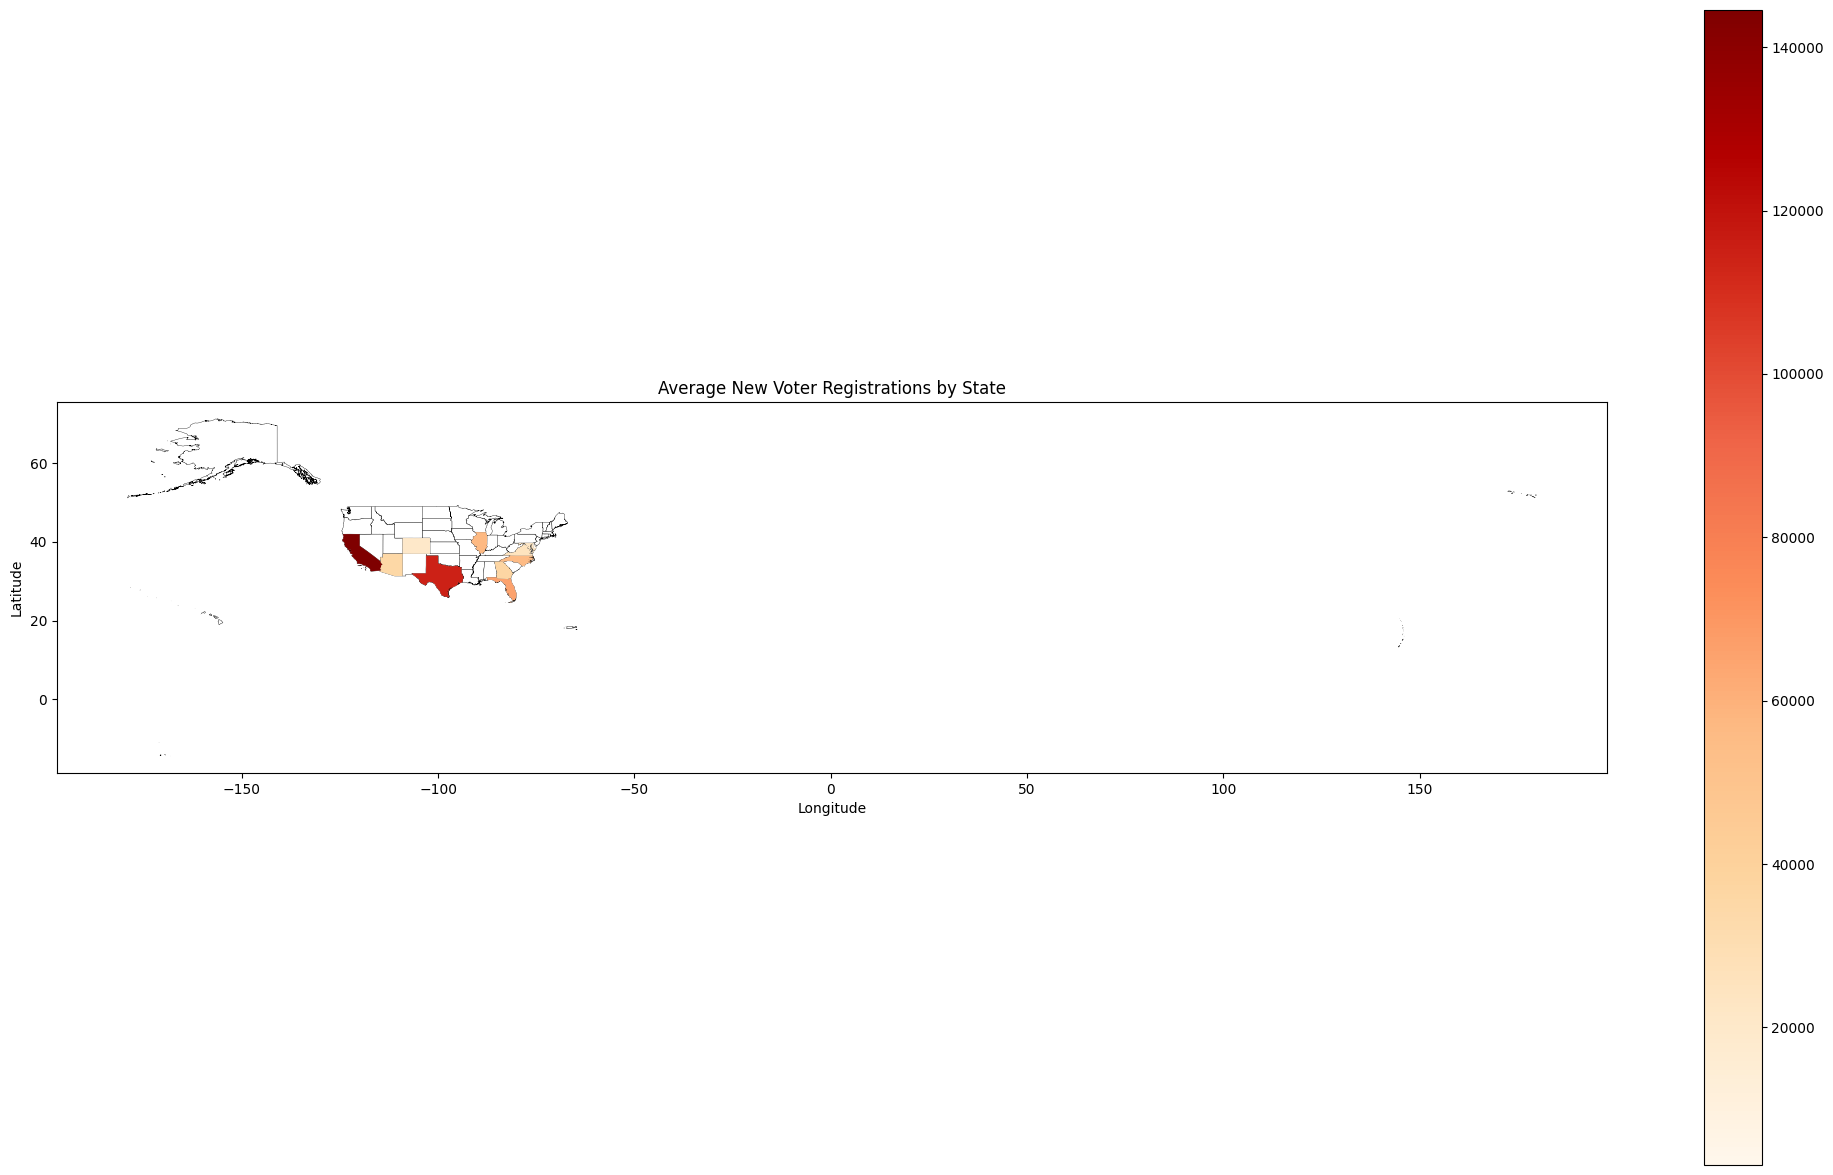

In [71]:
fig, ax = plt.subplots(figsize=(25, 15))

us_states.plot(ax=ax, color='white', edgecolor='black', linewidth=0.25)

merged.plot(column='registered_voters', cmap='OrRd', ax=ax, legend=True)

ax.set_title('Average New Voter Registrations by State')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.show()

The map displays the average new voter registrations by state. The states are outlined with a thin black line, and the color intensity (using the 'OrRd' color map) represents the average number of registrations. The state names and corresponding average values are annotated directly on the map for clarity. This visualization provides a clear geographic overview of voter registration trends across the United States.



Insights:
The analysis reveals considerable differences in new voter registrations across states and over time. Certain states consistently report higher registration numbers, while seasonal trends indicate that registrations peak during particular months. These insights suggest that local factors and timing play key roles in voter engagement.

Suggestions:
It is advisable for policymakers to focus additional voter outreach efforts on states with lower registration numbers. Seasonal variations indicate that off-peak periods might benefit from targeted registration drives. Incorporating supplementary demographic data could improve understanding of underlying factors influencing voter registration trends.

Possible Next Steps:
Future work should consider expanding the dataset to include additional years and more regional data. Integrating socio-economic and demographic variables could help explain the observed patterns. Maybe even conducting predictive analyses might assist in planning effective voter outreach strategies ahead of upcoming elections.

Link to Github going to be added on brightspace

# Academic Integrity Statement

By writing my name in the cell below, I certify that:

1. I did not use resources other than:
   * the Python notebooks provided by the instructor,
   * links provided in this notebook,
   * the assigned readings, and
   * my own personal notes
2. This means that I did not:
   * look up anything on Google, or Stack Overflow, Chatgpt, &c.,
   * discuss the content of the exam with *anyone* other than the instructors or TAs, or
   * do anything that technically doen't break these rules but is against their spirit.

Fernando Canales